# Seminar: Exploratory Data Analysis in Python/Pandas environment

* We will explore and understand the Ames Housing dataset of real estate sales
* The content is based on the Kaggle Competition House Prices Advanced Regression Techniques. See details [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

## Definitions

In [1]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

## Task 1: Read data and undestand it's structure

### 1a. Load training dataset (in `./data/train.csv`) and display 5 random rows

Hint: Use `.style` attribute to display all columns

Hint: See  `./data/data_description.txt` for documentation of variables

In [10]:
df = pd.read_csv('./train.csv', index_col='Id')
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1252,120,RL,NaN,3136,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,171750
315,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,178000
1108,60,RL,168.0,23257,Pave,NaN,IR3,HLS,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,274725
926,20,RL,NaN,15611,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2008,WD,Abnorml,175000
1404,20,RL,49.0,15256,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,282922


### 1b. What is the distribution `SalePrice` variable?

* plot histogram (`.hist()` on `pd.Series`) with bin width $10,000

Hint: Specify bins using range

<Axes: >

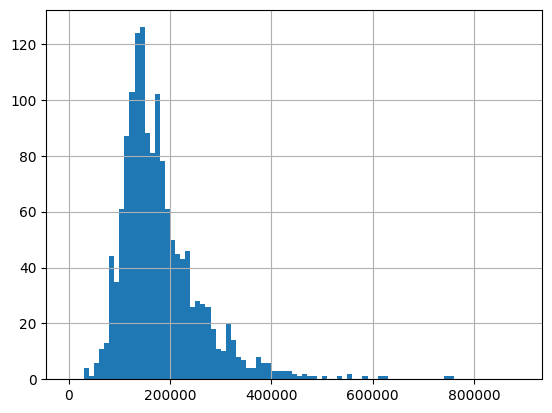

In [16]:
df.SalePrice
df.SalePrice.hist(bins = range(0, 900000, 10000))

### 1c. Split columns between quantitative and qualitative variables
Store column names in separate lists of strings `quantitative` and `qualitative`

Hint: `.dtypes` attribute contains a series with strings describing dtype of the data

In [26]:
quantitative = [column for column in df.columns if df.dtypes[column] != 'object']
qualitative = [column for column in df.columns if df.dtypes[column] == 'object']
print(quantitative)
print(qualitative)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual

### 1d. Are `dtype`s correct? 

* visually check whether all the columns look correctly parsed

In [27]:
df[qualitative]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


In [28]:
df[quantitative]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


### 1e. Plot number of missing data for all columns
* You can drop columns with no missing data

<Axes: >

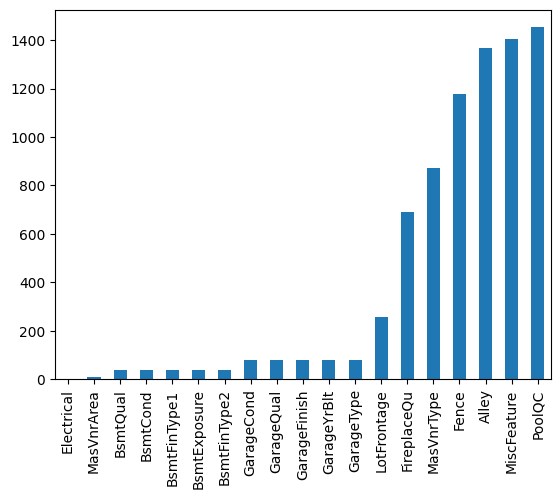

In [46]:
col_mv = [col for col in df.columns if df[col].isnull().sum()!=0]
df[col_mv].isnull().sum().sort_values().plot.bar()

## Bonus: Distribution of all variables

### Quantitative


### Quantitative

## Task 2: Study relationships between variables

### 2a. see correlation matrix

### 2b. Boxplots for categorical variables

## Task 3: ANOVA disparity estimations 

### One-way ANOVA 
* Question: Do sale prices differ across categories of certain feature?
* Test: Do price means across factors with a feature differ in their underlying distribution? 
* Are prices of houses with pool drawn from distribution with different mean than prices of house without a pool? 

* We will test this on all features and plot results

### 3a. Function for estimating ANOVA for one feature
* Your task is to complete a following snippet:


```python

 def anova_feature(qualitative_series, quantitative_series):
    '''
    Performs One-way ANOVA testing whether all levels of `qualitative` series are drawn from distributions with equal means

    Expects:
    - 'qualitative_series': Series with categorical data delienating indivudal groups
    - 'quantitative_series': Series with value data on which the distribution is tested
    
    Uses `scipy.stats.f_oneway` to deliver the test.

    Returns pd.Series with `statistic`, `p_value` and `disparity` measure. `statistic` and `p_value` are calculated by `scipy.stats.f_oneway`. Disparity is calculated as 1/log(p_value).
    '''
    samples =  {
        factor: quantitative_series.loc[qualitative_series.fillna('MISSING') == factor] for factor in qualitative_series.fillna('MISSING').unique()
    }

    anova_result =  stats.f_oneway(*samples.values())
    
    pass
```

### 3b. Generate dataframe with ANOVA test of all quantitative columns on `SalePrice` in the dataset

### 3c. Plot the disparity measure

## Task 4: Encode qualitative variables as quantitative
### 4a. Feature-level function

* Write a function that  an input dataframe with encoded version
* Complete the following snippet

## 4b. Apply on all qualitative features
